In [60]:
!pip install folium
#For installing the required library for this visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df=pd.read_csv("zomato.csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.shape

(9551, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
features_with_null = [(i,df[i].isnull().sum())
                      for i in df.columns if df[i].isnull().sum()>0]
features_with_null

[('Cuisines', 9)]

<AxesSubplot:>

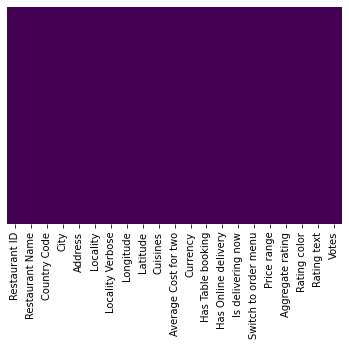

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df1=pd.read_excel("Country-Code.xlsx")
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [12]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [13]:
df_zomato= pd.merge(df,df1,how='left',on='Country Code')
df_zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [14]:
df_zomato.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [15]:
df_zomato.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [16]:
df_zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [17]:
df_zomato[df_zomato["Cuisines"].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,No,No,No,No,1,3.4,Orange,Average,34,United States
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,No,No,No,No,1,3.4,Orange,Average,36,United States
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,No,No,No,No,1,3.9,Yellow,Good,160,United States
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,No,No,No,No,3,3.9,Yellow,Good,209,United States
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,No,No,No,No,3,3.8,Yellow,Good,102,United States
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,No,No,No,No,1,3.4,Orange,Average,11,United States
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,No,No,No,No,3,4.4,Green,Very Good,1158,United States
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,No,No,No,No,1,4.7,Dark Green,Excellent,707,United States
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,No,No,No,No,1,3.9,Yellow,Good,309,United States


In [18]:
df_zomato.dropna(inplace=True)

In [19]:
df_zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [20]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

In [21]:
df_zomato.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


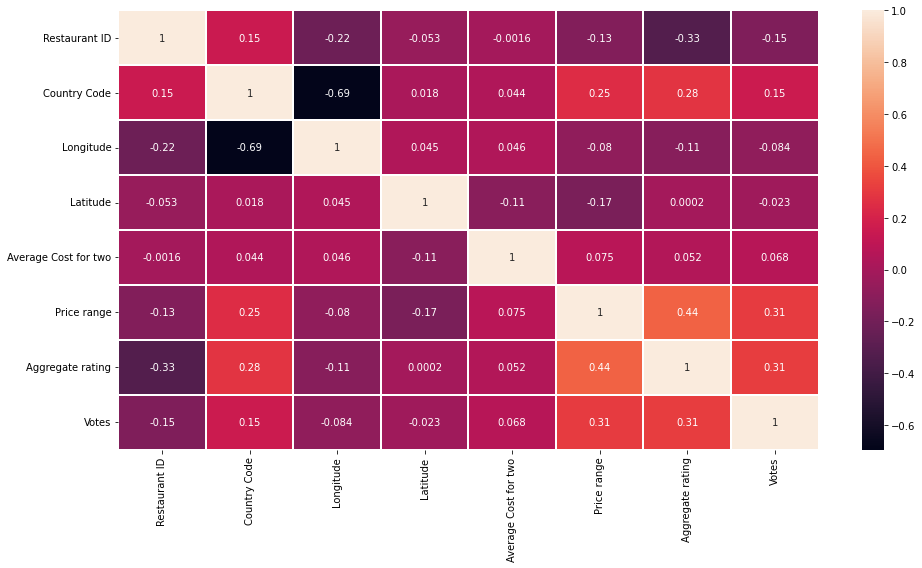

In [22]:
plt.figure(figsize=(14,8))
ax = sns.heatmap(df_zomato.corr(), annot=True, linewidths=2)
plt.tight_layout()
plt.show()

In [23]:
country_wise = df_zomato.groupby("Country")

In [24]:
country_wise.get_group('India')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,D Cabana,1,Vizag,"Beach Road, Near Bus Stop, Sagar Nagar, Visakh...",Sagar Nagar,"Sagar Nagar, Vizag",83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",...,No,No,No,No,2,3.6,Yellow,Good,193,India
9272,2800418,Kaloreez,1,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,"Siripuram, Vizag",0.000000,0.000000,"Cafe, North Indian, Chinese",...,No,No,No,No,2,3.7,Yellow,Good,85,India
9273,2800881,Plot 17,1,Vizag,"Plot 17, Gangapur Layout, Siripuram, Vizag",Siripuram,"Siripuram, Vizag",83.315281,17.719539,"Burger, Pizza, Biryani",...,No,No,No,No,2,4.3,Green,Very Good,172,India
9274,2800042,Vista - The Park,1,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay","The Park, Lawsons Bay, Vizag",83.336840,17.721182,"American, North Indian, Thai, Continental",...,No,No,No,No,4,3.8,Yellow,Good,74,India


In [25]:
operational_country = df_zomato["Country"].unique()

In [26]:
operational_country

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [27]:
print(len(country_wise.get_group("India"))/len(df_zomato))

0.9067281492349613


In [28]:
Country_wise_exposure = pd.DataFrame({"Country_name":operational_country,"% Exposure":[(len(country_wise.get_group(i))/len(df_zomato))*100 for i in operational_country]})

In [29]:
Country_wise_exposure

,Country_name,% Exposure
0,Phillipines,0.230560
1,Brazil,0.628799
2,United States,4.453993
3,Australia,0.251520
4,Canada,0.041920
5,Singapore,0.209600
6,UAE,0.628799
7,India,90.672815
8,Indonesia,0.220080
9,New Zealand,0.419199


In [30]:
top_3 = Country_wise_exposure.nlargest(3,"% Exposure")

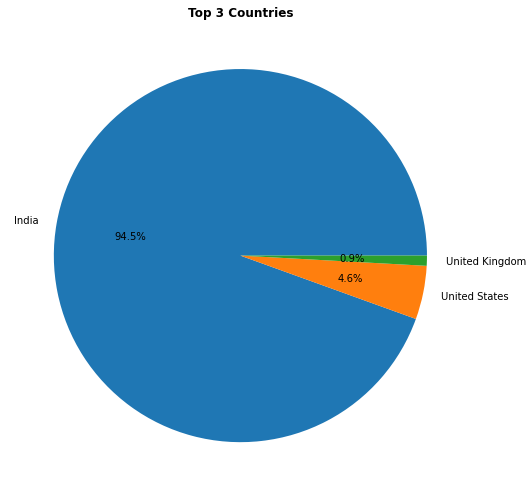

In [31]:
plt.figure(figsize=(12,7))
ax = plt.pie(top_3["% Exposure"], labels=top_3["Country_name"],autopct='%1.1f%%')
plt.title("Top 3 Countries",fontweight="bold")
plt.tight_layout()
plt.show()

In [32]:
indian_exposure=country_wise.get_group("India")

In [33]:
indian_exposure.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India


In [34]:
indian_exposure["City"].value_counts().nlargest(5)

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64

In [35]:
for i in indian_exposure["City"].value_counts().nlargest(5).index:
    print("The number of unique restaurant in {} is {}".format(i,indian_exposure[indian_exposure["City"]==i]["Restaurant Name"].nunique()))

The number of unique restaurant in New Delhi is 4295
The number of unique restaurant in Gurgaon is 943
The number of unique restaurant in Noida is 902
The number of unique restaurant in Faridabad is 235
The number of unique restaurant in Ghaziabad is 25


In [36]:
indian_exposure["City"].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

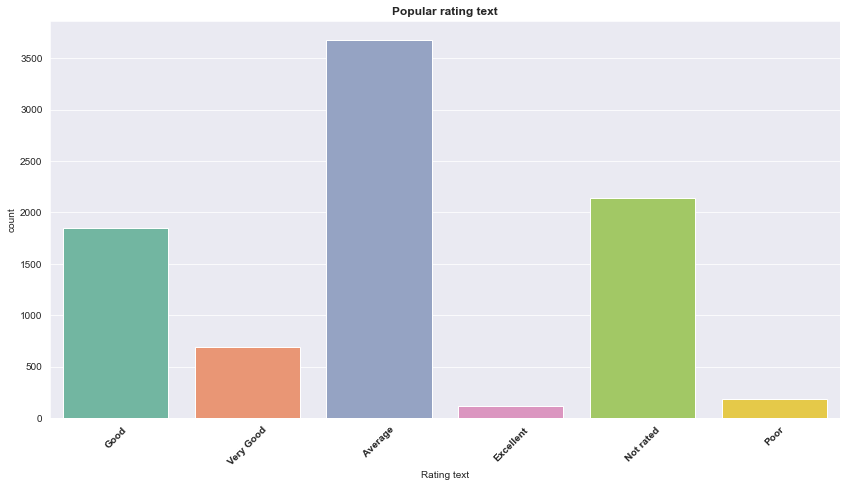

In [37]:
plt.figure(figsize=(12,7))
sns.set_style("darkgrid")
ax = sns.countplot(x="Rating text",data=indian_exposure,palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontweight="bold")
plt.title("Popular rating text",fontweight="bold")
sns.set(font_scale=1.2)
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Categorical columns visualization in context of india')

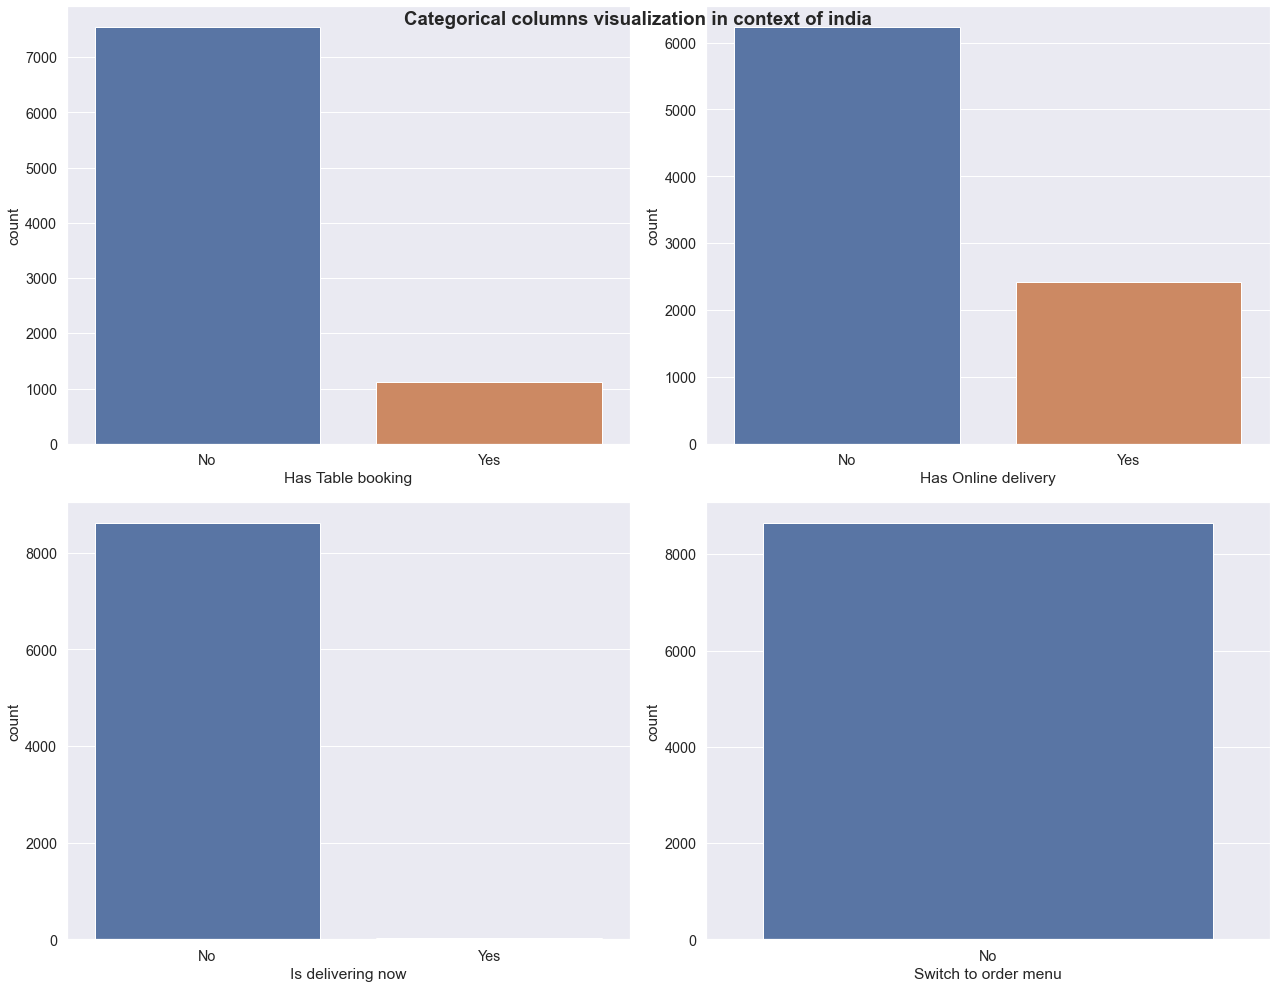

In [38]:
yes_no_columns = ["Has Table booking","Has Online delivery","Is delivering now","Switch to order menu"]
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
  
for i, c in enumerate(yes_no_columns):
    sns.countplot(data=indian_exposure, x=c, ax=axes[i])     
plt.tight_layout()
plt.suptitle("Categorical columns visualization in context of india",fontweight="bold")

In [39]:
city_wise_data = round(indian_exposure.groupby("City").mean()[["Average Cost for two","Aggregate rating","Price range"]],2).reset_index()

In [40]:
city_wise_data

,City,Average Cost for two,Aggregate rating,Price range
0,Agra,1065.00,3.96,2.65
1,Ahmedabad,857.14,4.16,2.57
2,Allahabad,517.50,3.40,2.65
3,Amritsar,480.95,3.69,1.81
4,Aurangabad,622.50,3.38,2.20
5,Bangalore,1232.50,4.38,2.70
6,Bhopal,620.00,3.95,2.15
7,Bhubaneshwar,678.57,3.98,1.86
8,Chandigarh,1072.22,4.05,2.50
9,Chennai,1085.00,4.31,2.45


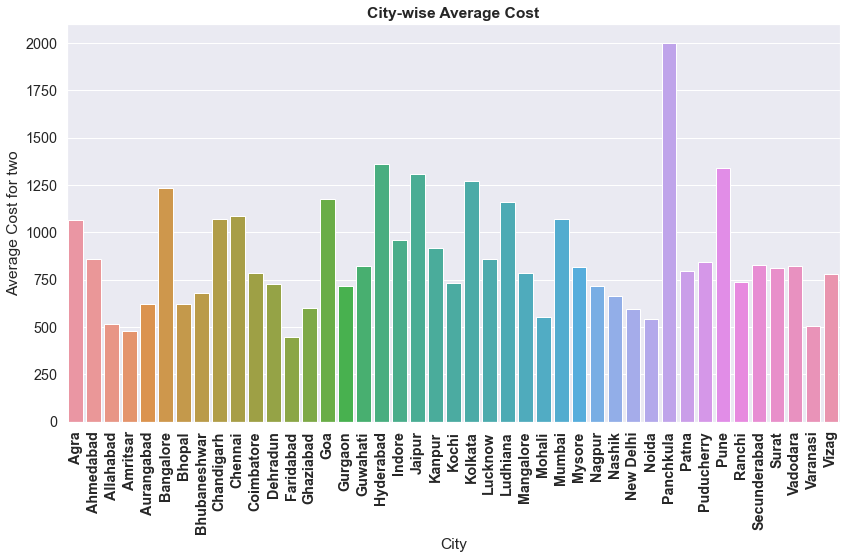

In [41]:
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.barplot(x="City", y="Average Cost for two", data=city_wise_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontweight="bold")
plt.title("City-wise Average Cost",fontweight="bold")
sns.set(font_scale=1.2)
plt.tight_layout()
plt.show()

In [42]:
city_wise_data.nsmallest(5,"Average Cost for two")

,City,Average Cost for two,Aggregate rating,Price range
12,Faridabad,447.61,1.87,1.45
3,Amritsar,480.95,3.69,1.81
41,Varanasi,505.00,3.51,2.45
2,Allahabad,517.50,3.40,2.65
32,Noida,539.49,2.04,1.60


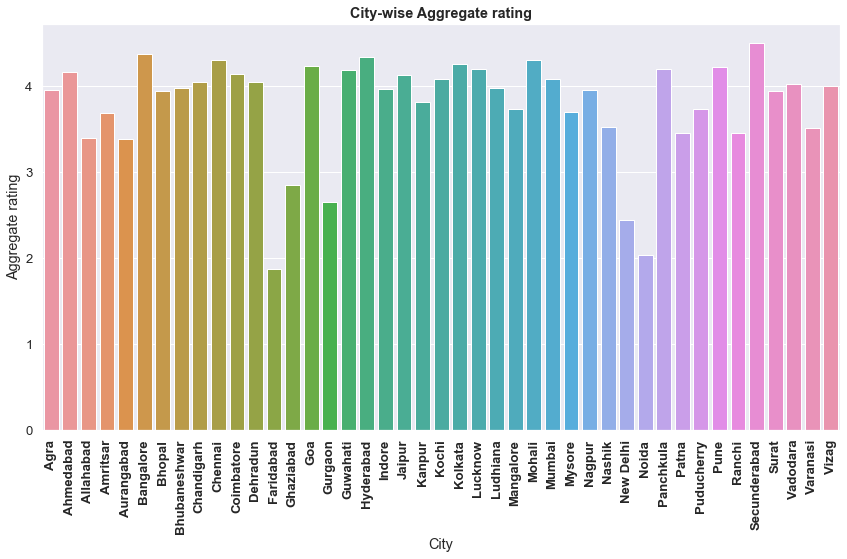

In [43]:
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.barplot(x="City", y="Aggregate rating", data=city_wise_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontweight="bold")
plt.title("City-wise Aggregate rating",fontweight="bold")
sns.set(font_scale=1.2)
plt.tight_layout()
plt.show()

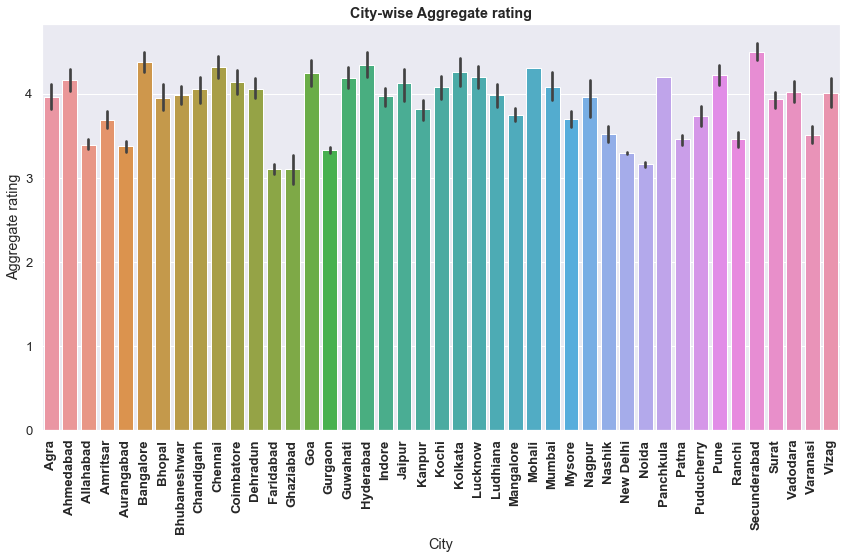

In [44]:
data1 = indian_exposure[indian_exposure["Aggregate rating"]!=0]
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.barplot(x="City", y="Aggregate rating", data=data1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontweight="bold")
plt.title("City-wise Aggregate rating",fontweight="bold")
sns.set(font_scale=1.2)
plt.tight_layout()
plt.show()

In [45]:
city_wise_data.nsmallest(5,"Aggregate rating")

,City,Average Cost for two,Aggregate rating,Price range
12,Faridabad,447.61,1.87,1.45
32,Noida,539.49,2.04,1.60
31,New Delhi,596.09,2.44,1.62
15,Gurgaon,714.02,2.65,1.86
13,Ghaziabad,602.00,2.85,1.80


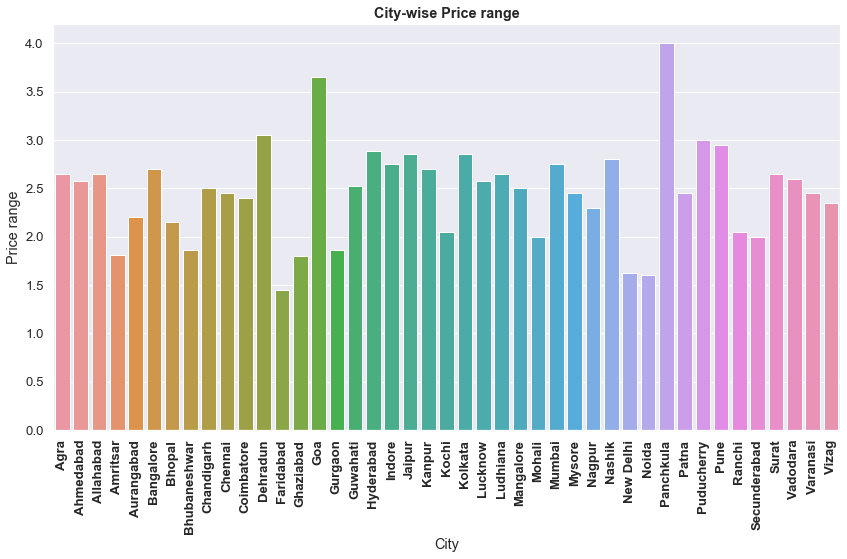

In [46]:
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.barplot(x="City", y="Price range", data=city_wise_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontweight="bold")
plt.title("City-wise Price range",fontweight="bold")
sns.set(font_scale=1.2)
plt.tight_layout()
plt.show()

In [47]:
city_group = indian_exposure.groupby("City")

In [48]:
city_group.get_group("Faridabad")["Restaurant Name"].nunique()

235

In [49]:
faridabad_grouped = round(city_group.get_group("Faridabad").groupby("Restaurant Name").mean()
                          [["Average Cost for two","Aggregate rating","Price range"]],2).reset_index()

In [50]:
faridabad_grouped

,Restaurant Name,Average Cost for two,Aggregate rating,Price range
0,Aapki Rasoi,200.0,0.0,1.0
1,Aggarwal Sweet Corner,100.0,0.0,1.0
2,Aggarwal Sweets And Caterers,100.0,0.0,1.0
3,Aggarwal Sweets Centre,100.0,2.9,1.0
4,Aggarwal's Bikaner Mishthan Bhandar,100.0,0.0,1.0
...,...,...,...,...
230,Vrindavan Sweets & Restaurant,350.0,3.0,1.0
231,Welcome,700.0,2.9,2.0
232,World Cafe - Vibe by The LaLiT Traveller,1900.0,3.3,3.0
233,Yo! China,1300.0,4.1,3.0


In [51]:
indian_exposure[indian_exposure["Aggregate rating"]==0]["City"].unique()

array(['Faridabad', 'Ghaziabad', 'Gurgaon', 'New Delhi', 'Noida'],
      dtype=object)

In [52]:
indian_exposure[indian_exposure["Average Cost for two"]==0]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
634,3400073,The Latitude - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Chinese, Continental",...,No,No,No,No,1,3.9,Yellow,Good,103,India
637,3400346,Sheroes Hangout,1,Agra,"Opposite The Gateway Hotel, Fatehabad Road, Ta...",Tajganj,"Tajganj, Agra",78.040165,27.161850,"Cafe, North Indian, Chinese",...,No,No,No,No,1,4.9,Dark Green,Excellent,77,India
639,3400391,Chapter 1 Cafe,1,Agra,"1374 K/1375 K, 2nd floor, Dinesh Nagar, Fatehb...",Tajganj,"Tajganj, Agra",0.000000,0.000000,"Cafe, Italian, Mexican, North Indian, Continental",...,No,No,No,No,1,3.9,Yellow,Good,98,India
677,18317988,The BrewMaster,1,Allahabad,"Near Vishal Megamart, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",81.832796,25.451646,"North Indian, Chinese, Italian",...,No,No,No,No,1,3.3,Orange,Average,49,India
851,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",...,No,No,No,No,1,4.3,Green,Very Good,63,India
2364,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",...,No,No,No,No,1,3.6,Yellow,Good,34,India
2368,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",...,No,No,No,No,1,3.9,Yellow,Good,127,India
9242,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,...,No,No,No,No,1,3.8,Yellow,Good,78,India
9254,18246202,VNS Live Studio,1,Varanasi,"Hotel Varuna Ground Floor, 22 Gulab Bagh, Sigr...",Sigra,"Sigra, Varanasi",82.991694,25.318345,"Chinese, North Indian",...,No,No,No,No,1,3.5,Yellow,Good,109,India


In [53]:
indian_exposure[indian_exposure["Votes"]==0]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
874,18433852,The Chaiwalas,1,Faridabad,"Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...",Badkal Lake,"Badkal Lake, Faridabad",77.300088,28.426284,Cafe,...,No,No,No,No,1,0.0,White,Not rated,0,India
879,18465871,Fusion Food Corner,1,Faridabad,"158/7, Opposite DDA Flat, Pul Pehlad Pur, Char...",Charmwood Village,"Charmwood Village, Faridabad",0.000000,0.000000,"North Indian, Chinese",...,No,No,No,No,1,0.0,White,Not rated,0,India
880,18472646,Punjabi Rasoi,1,Faridabad,"1, Deepak Complex, Eros Charmwood Village, Far...",Charmwood Village,"Charmwood Village, Faridabad",77.292431,28.492325,North Indian,...,No,No,No,No,1,0.0,White,Not rated,0,India
887,18471268,Baskin Robbin,1,Faridabad,"Ground Floor, Crown Interiorz Mall, Sector 35,...","Crown Interiorz Mall, Sector 35, Faridabad","Crown Interiorz Mall, Sector 35, Faridabad, Fa...",77.307448,28.469594,Desserts,...,No,No,No,No,1,0.0,White,Not rated,0,India
900,308961,Angaar,1,Faridabad,"Hotel Saffron Kiran, 12/6, Adjacent to Badarpu...","Hotel Saffron Kiran, Faridabad","Hotel Saffron Kiran, Faridabad, Faridabad",77.305698,28.471985,"North Indian, Chinese",...,Yes,No,No,No,3,0.0,White,Not rated,0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,18486858,6 Packs Momos,1,Noida,"Spice World Mall, Sector 25, Noida","Spice World Mall, Sector 25","Spice World Mall, Sector 25, Noida",77.340602,28.586000,Chinese,...,No,No,No,No,1,0.0,White,Not rated,0,India
9098,18431152,Cafe' Wow,1,Noida,"Food Court, 3rd Floor, The Great India Palace ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.325600,28.567514,Fast Food,...,No,No,No,No,1,0.0,White,Not rated,0,India
9099,18439721,Chef's Basket Pop Up Caf��,1,Noida,"Inside Big Bazaar, The Great India Place, Sect...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",0.000000,0.000000,"Italian, Chinese",...,No,No,No,No,1,0.0,White,Not rated,0,India
9103,18428504,The Hangout-Deli,1,Noida,"320-A, 3rd Floor, The Great India Place Mall, ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.323213,28.567751,"Continental, Lebanese, Mexican",...,Yes,No,No,No,3,0.0,White,Not rated,0,India


In [54]:
new_data = df_zomato.copy()

In [55]:
new_data = new_data[new_data["Longitude"]!=0]

In [56]:
new_data.shape

(9044, 22)

In [61]:
import folium

In [62]:
map = folium.Map(location=[new_data['Latitude'].mean(), new_data['Longitude'].mean()], zoom_start=12)

In [63]:
for index, row in new_data.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    restaurant_name = row['Restaurant Name']
    
    marker = folium.Marker(location=[lat, lon], popup=restaurant_name)
    
    marker.add_to(map)

In [64]:
indian_exposure.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [65]:
required_columns_for_distribution = ["Average Cost for two","Price range","Aggregate rating","Votes"]

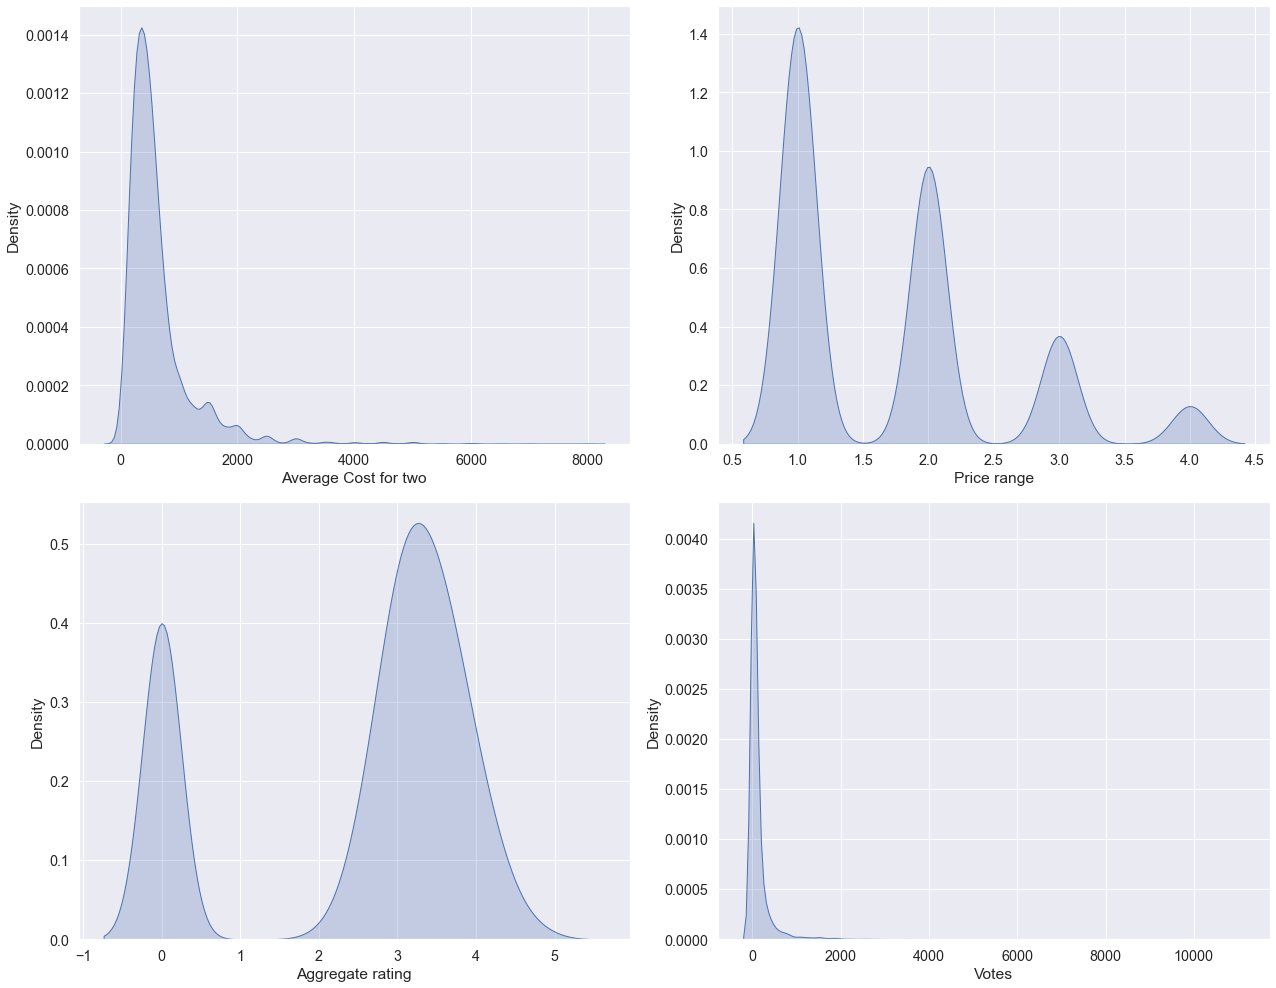

In [66]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(required_columns_for_distribution):
    sns.kdeplot(data=indian_exposure, x=c, ax=axes[i], fill=True)   
plt.tight_layout()

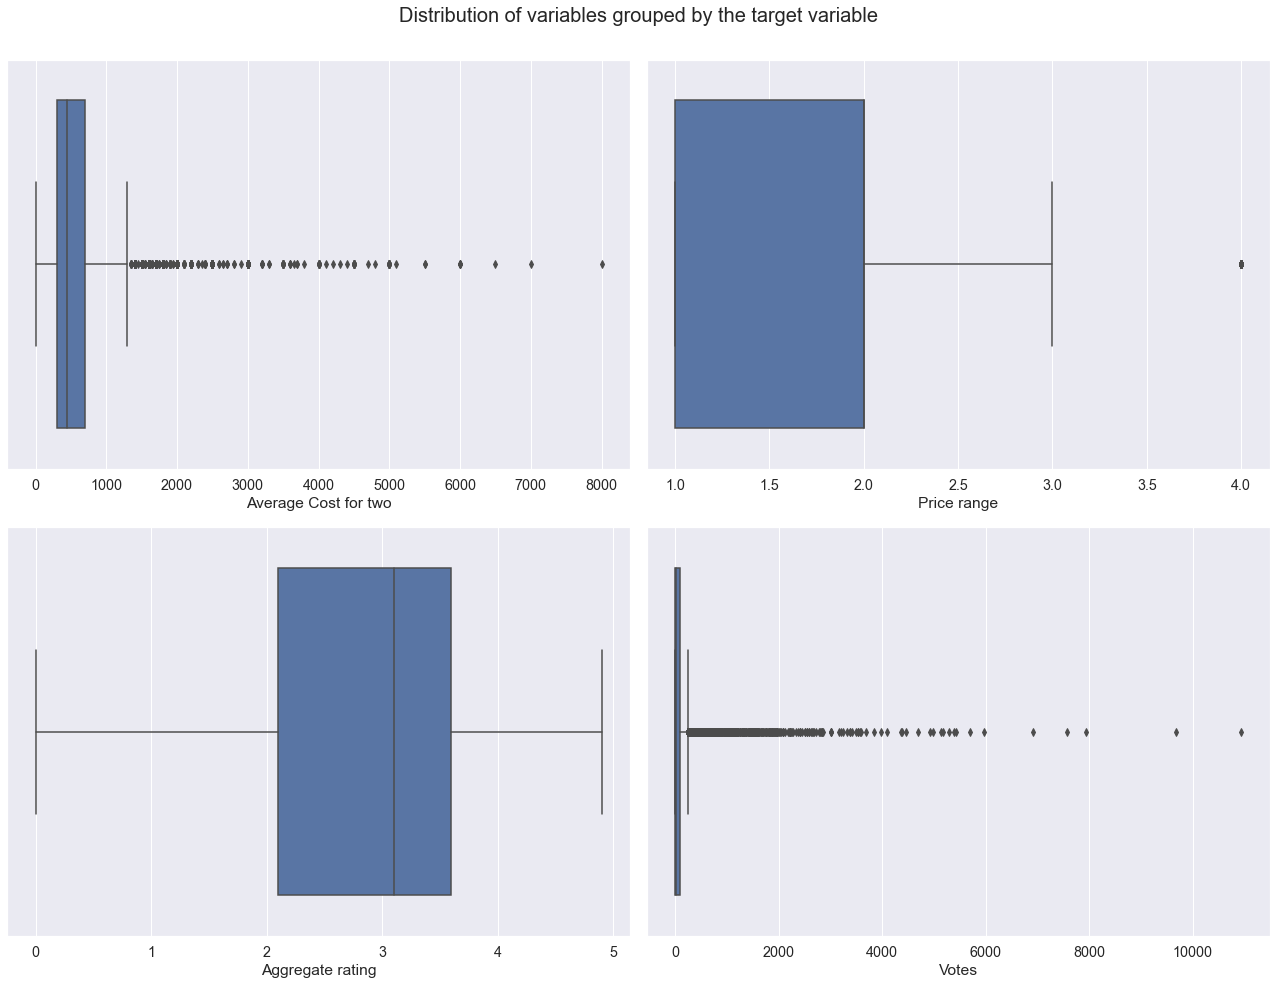

In [67]:
fig1, ax1 = plt.subplots(ncols=2, nrows=2, figsize=(18,14))
for i, j in zip(required_columns_for_distribution, ax1.flatten()):
        sns.boxplot(data=indian_exposure,x=i,ax=j)

fig1.suptitle('Distribution of variables grouped by the target variable', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

In [68]:
indian_exposure[indian_exposure["Price range"]==4]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
629,3400325,MoMo Cafe,1,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.000000,"North Indian, European",...,No,No,No,No,4,4.0,Green,Very Good,45,India
630,3400059,Peshawri - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,"North Indian, Mughlai",...,No,No,No,No,4,4.3,Green,Very Good,133,India
631,3400060,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,...,No,No,No,No,4,4.0,Green,Very Good,41,India
633,3400072,Dawat-e-Nawab - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Mughlai",...,No,No,No,No,4,3.8,Yellow,Good,46,India
638,3400350,Bon Barbecue,1,Agra,"Parador Hotel, 3A-3B, Phase 1, Fatehabad Road,...",Tajganj,"Tajganj, Agra",0.000000,0.000000,"North Indian, Chinese, Continental",...,No,No,No,No,4,3.8,Yellow,Good,57,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9251,3900010,The Great Kabab Factory - Radisson Hotel,1,Varanasi,"Radisson Hotel, The Mall Road, Nadesar, Varanasi","Radisson Hotel, Nadesar","Radisson Hotel, Nadesar, Varanasi",82.980810,25.338373,"North Indian, Mughlai",...,No,No,No,No,4,3.3,Orange,Average,67,India
9252,3900055,I:ba Cafe & Restaurant,1,Varanasi,"B 3/335, Krimkund, Shivala, Varanasi",Shivala,"Shivala, Varanasi",0.000000,0.000000,"Japanese, American, North Indian, Fast Food",...,No,No,No,No,4,3.5,Yellow,Good,83,India
9260,2800052,The Square - Hotel Novotel,1,Vizag,"Hotel Novotel, Beach Road, Maharani Peta, Vizag","Hotel Novotel, Maharani Peta","Hotel Novotel, Maharani Peta, Vizag",83.315935,17.710690,"Continental, North Indian",...,No,No,No,No,4,4.1,Green,Very Good,125,India
9262,2800856,Barbeque Nation,1,Vizag,"1st Floor, ATR Towers, Harbour Park Road, Pan...",Kirlampudi Layout,"Kirlampudi Layout, Vizag",0.000000,0.000000,"North Indian, Chinese, Mediterranean",...,No,No,No,No,4,4.9,Dark Green,Excellent,345,India


In [69]:
indian_exposure[indian_exposure["Votes"]==10934]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
728,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",...,No,No,No,No,4,4.8,Dark Green,Excellent,10934,India


In [70]:
top_restaurant_of_city = indian_exposure[indian_exposure["Aggregate rating"]>4].groupby("City")

In [71]:
top_restaurant_of_city.get_group("New Delhi")

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
2572,18425159,Nariyal Cafe,1,New Delhi,"A-4, 3rd Foor, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.199152,28.538438,"Continental, Seafood, Goan, Andhra, Kerala, Thai",...,Yes,No,No,No,3,4.2,Green,Very Good,46,India
2573,310958,Rustom's Parsi Bhonu,1,New Delhi,"94-A/B, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198157,28.537896,Parsi,...,Yes,Yes,No,No,3,4.2,Green,Very Good,665,India
2633,312300,Peninsular Kitchen,1,New Delhi,"Level 3, Ambience Mall, Vasant Kunj, New Delhi","Ambience Mall, Vasant Kunj","Ambience Mall, Vasant Kunj, New Delhi",77.155095,28.541141,"Seafood, South Indian, Andhra, Hyderabadi, Goan",...,Yes,Yes,No,No,3,4.2,Green,Very Good,336,India
2635,307113,Diggin,1,New Delhi,"Anand Lok Shopping Centre, Opposite Gargi Coll...",Anand Lok,"Anand Lok, New Delhi",77.219498,28.555636,"Italian, Continental, Cafe",...,Yes,Yes,No,No,3,4.2,Green,Very Good,2131,India
2684,18441775,Jom Jom Malay,1,New Delhi,"BG 04, Ansal Plaza, Andrews Ganj, Khel Gaon Ma...","Ansal Plaza Mall, Khel Gaon Marg","Ansal Plaza Mall, Khel Gaon Marg, New Delhi",77.224443,28.563155,"Malaysian, Indonesian",...,No,No,No,No,3,4.4,Green,Very Good,77,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7863,301700,Big Yellow Door,1,New Delhi,"H-8 B, Near GTB Nagar Metro Station, Opposite ...",Vijay Nagar,"Vijay Nagar, New Delhi",77.204991,28.693444,"Cafe, Italian, Fast Food",...,No,No,No,No,2,4.3,Green,Very Good,3986,India
7864,303849,Mr. Crust Bakers,1,New Delhi,"B-29/B, Opposite Mother Dairy, Vijay Nagar, Ne...",Vijay Nagar,"Vijay Nagar, New Delhi",77.201487,28.690601,"Bakery, Desserts, Fast Food",...,No,No,No,No,1,4.2,Green,Very Good,741,India
7865,18258484,Phonebooth Caf��,1,New Delhi,"G-14 B, Hudson Lane, Vijay Nagar, New Delhi",Vijay Nagar,"Vijay Nagar, New Delhi",77.204008,28.694381,"North Indian, Continental, Chinese, Italian",...,No,Yes,No,No,2,4.1,Green,Very Good,636,India
7866,18157386,Tony's,1,New Delhi,"C-23, Single Storey, Vijay Nagar, New Delhi",Vijay Nagar,"Vijay Nagar, New Delhi",77.201128,28.692000,Fast Food,...,No,Yes,No,No,1,4.4,Green,Very Good,163,India


In [72]:
d1 = indian_exposure.copy()

In [73]:
d1["Cuisines"]=d1["Cuisines"].str.split(",")

In [74]:
d1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"[North Indian, Mughlai]",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"[North Indian, Mughlai]",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,[North Indian],...,No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,[Rajasthani],...,No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"[North Indian, Chinese, Mughlai]",...,No,No,No,No,3,4.2,Green,Very Good,177,India


In [75]:
indian_cuisines = []
for i in d1["Cuisines"]:
    for j in i:
        if j.strip() not in indian_cuisines:
            indian_cuisines.append(j.strip())

In [76]:
indian_cuisines

['North Indian',
 'Mughlai',
 'Rajasthani',
 'Chinese',
 'European',
 'Gujarati',
 'Continental',
 'South Indian',
 'Desserts',
 'Cafe',
 'Italian',
 'Mexican',
 'Pizza',
 'Fast Food',
 'Mediterranean',
 'Thai',
 'Ice Cream',
 'Beverages',
 'Asian',
 'Street Food',
 'Sandwich',
 'Burger',
 'Healthy Food',
 'American',
 'Armenian',
 'Salad',
 'Bakery',
 'Mithai',
 'Biryani',
 'Juices',
 'Maharashtrian',
 'Hyderabadi',
 'Modern Indian',
 'Finger Food',
 'Tex-Mex',
 'Arabian',
 'Charcoal Grill',
 'Steak',
 'Seafood',
 'Tea',
 'Japanese',
 'Malaysian',
 'Burmese',
 'Chettinad',
 'Spanish',
 'Greek',
 'Indian',
 'Parsi',
 'Tibetan',
 'Raw Meats',
 'French',
 'Goan',
 'German',
 'Kerala',
 'Lebanese',
 'Belgian',
 'Kashmiri',
 'Sushi',
 'South American',
 'Persian',
 'Bengali',
 'Portuguese',
 'African',
 'Iranian',
 'Vietnamese',
 'Lucknowi',
 'Korean',
 'Awadhi',
 'Nepalese',
 'Drinks Only',
 'Pakistani',
 'North Eastern',
 'Oriya',
 'Bihari',
 'Afghani',
 'Middle Eastern',
 'Indonesian',


In [77]:
len(indian_cuisines)

90

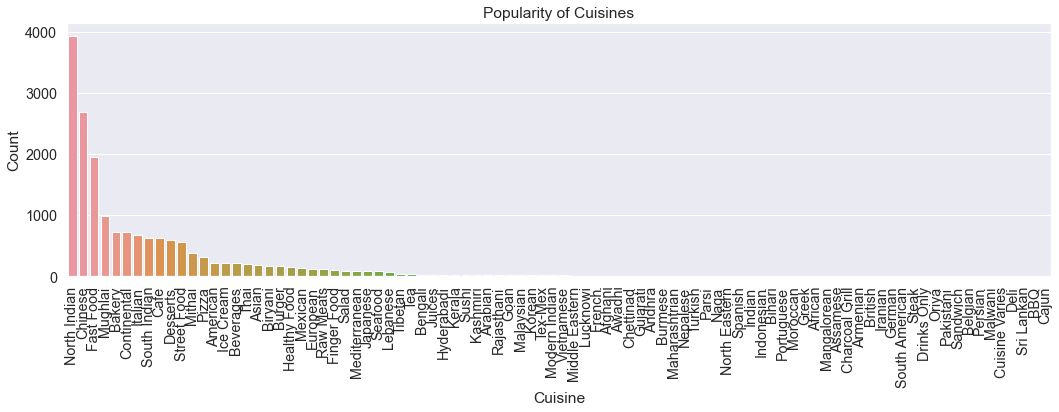

In [78]:
all_cuisines = [cuisine.strip() for i in d1["Cuisines"] for cuisine in i]

cuisine_counts = pd.Series(all_cuisines).value_counts()

plt.figure(figsize=(15, 6))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Popularity of Cuisines')
plt.tight_layout()
plt.show()

In [79]:
cuisine_counts = cuisine_counts[cuisine_counts.values>30]

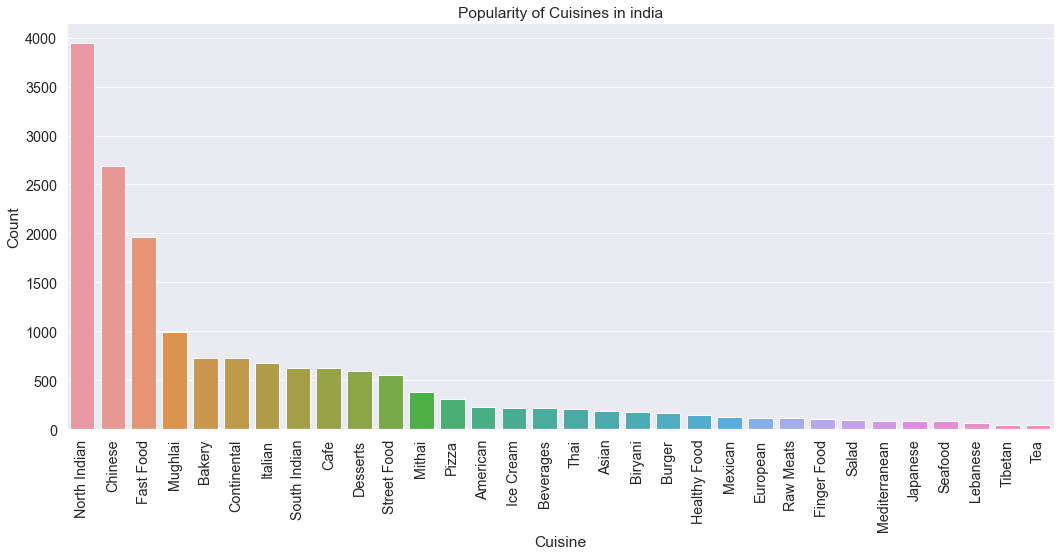

In [80]:
plt.figure(figsize=(15, 8))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Popularity of Cuisines in india')
plt.tight_layout()
plt.show()

In [87]:
d2 = df_zomato.copy()

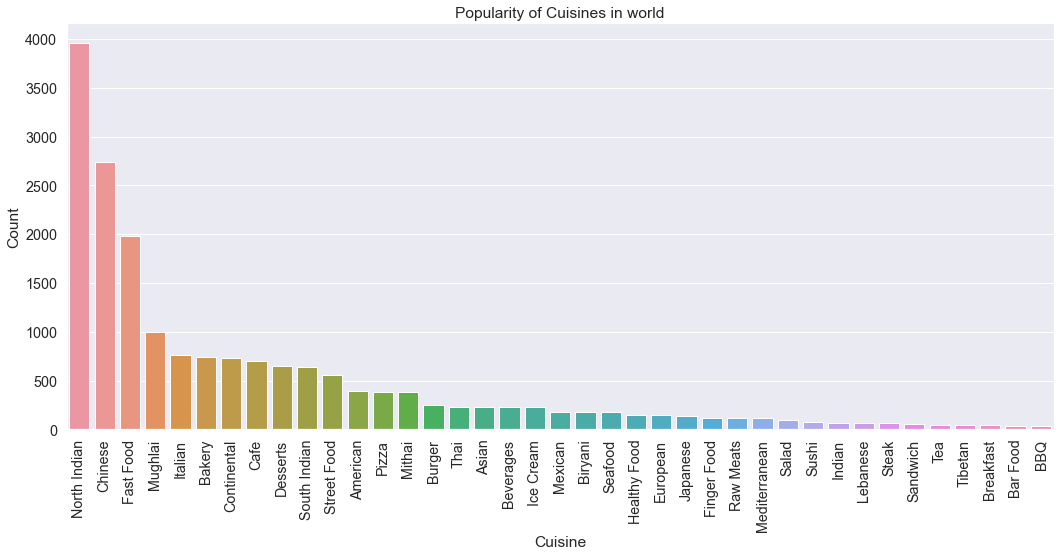

In [88]:
d2["Cuisines"]=d2["Cuisines"].str.split(",")
all_cuisines_around_world = [cuisine.strip() for i in d2["Cuisines"] for cuisine in i]

# Get the counts of each cuisine
cuisine_counts_world = pd.Series(all_cuisines_around_world).value_counts()
cuisine_counts_world = cuisine_counts_world[cuisine_counts_world.values>30]

# Plot the cuisine popularity
plt.figure(figsize=(15, 8))
sns.barplot(x=cuisine_counts_world.index, y=cuisine_counts_world.values)
plt.xticks(rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Popularity of Cuisines in world')
plt.tight_layout()
plt.show()

In [89]:
delhi_data = round(city_group.get_group("New Delhi").groupby("Locality").mean()[["Average Cost for two","Price range","Aggregate rating","Votes"]],2).reset_index()

In [90]:
delhi_data

,Locality,Average Cost for two,Price range,Aggregate rating,Votes
0,"ARSS Mall, Paschim Vihar",500.00,2.00,3.10,117.00
1,Aaya Nagar,500.00,2.00,0.00,2.00
2,Adchini,823.08,2.00,3.29,120.00
3,"Aditya Mega Mall, Karkardooma",775.00,2.25,3.28,108.50
4,Aerocity,712.50,2.00,1.60,15.25
...,...,...,...,...,...
249,"Worldmark 1, Aerocity",582.14,1.86,1.15,6.64
250,"Worldmark 3, Aerocity",700.00,2.00,0.00,3.00
251,Yusuf Sarai,372.00,1.24,1.97,37.24
252,Zakir Nagar,339.29,1.21,0.00,0.29


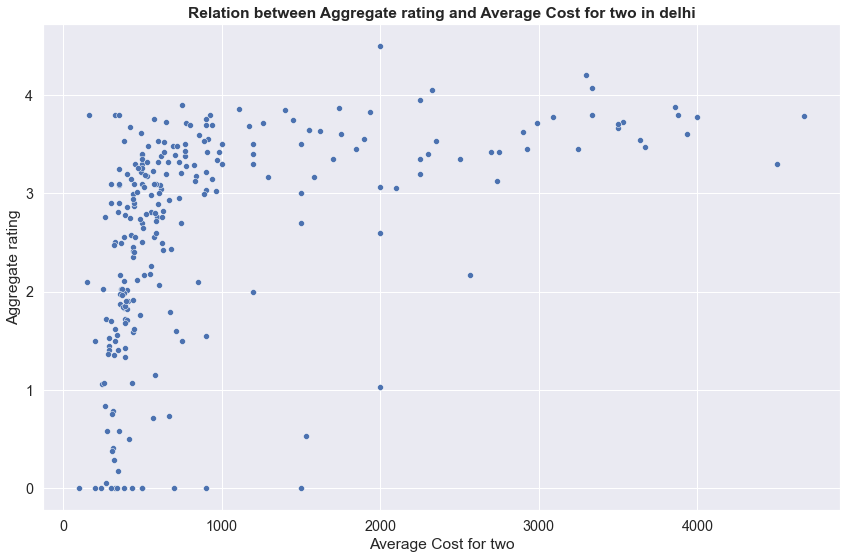

In [91]:
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.scatterplot(x="Average Cost for two", y="Aggregate rating", data=delhi_data)
plt.title("Relation between Aggregate rating and Average Cost for two in delhi",fontweight="bold")
sns.set(font_scale=1.2)
plt.tight_layout()
plt.show()

In [92]:
delhi_data.nlargest(10,"Average Cost for two")

,Locality,Average Cost for two,Price range,Aggregate rating,Votes
225,"The Taj Mahal Hotel, Mansingh Road",4671.43,4.00,3.79,282.29
89,JW Marriott New Delhi,4500.00,4.00,3.30,15.00
221,"The Leela Palace, Chanakyapuri",4000.00,4.00,3.78,141.80
217,"The Imperial, Janpath",3933.33,3.78,3.60,93.67
226,"The Taj Palace Hotel, Chanakyapuri",3875.00,3.75,3.80,71.75
198,"Shangri La's - Eros hotel, Janpath",3860.00,4.00,3.88,125.20
223,"The Park, Connaught Place",3666.67,4.00,3.47,380.33
219,"The Lalit New Delhi, Barakhamba Road",3637.50,3.62,3.54,208.25
84,"ITC Maurya, Chanakyapuri",3533.33,3.67,3.73,520.17
117,"Le Meridien, Janpath",3500.00,4.00,3.67,120.83


In [93]:
Economical_delhi_region = delhi_data[(delhi_data["Average Cost for two"]<800) & (delhi_data["Aggregate rating"]>3.5)]

In [94]:
Economical_delhi_region

,Locality,Average Cost for two,Price range,Aggregate rating,Votes
26,Chawri Bazar,162.50,1.00,3.80,117.50
43,"DLF Promenade Mall, Vasant Kunj",573.08,1.62,3.76,149.69
103,Karampura,383.33,1.33,3.53,97.67
114,Lajpat Nagar 4,325.00,1.50,3.80,546.00
138,Model Town 1,350.00,1.00,3.80,727.00
151,Netaji Subhash Place,600.00,1.65,3.53,159.62
161,Panchsheel Park,637.50,1.75,3.52,57.75
168,Pragati Maidan,750.00,2.00,3.90,1156.50
195,Shahpur Jat,776.92,2.23,3.72,110.85
233,Uday Park,650.00,2.00,3.73,205.00


In [95]:
indian_exposure["City"].unique()

array(['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar', 'Aurangabad',
       'Bangalore', 'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Chennai',
       'Coimbatore', 'Dehradun', 'Faridabad', 'Ghaziabad', 'Goa',
       'Gurgaon', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Kanpur',
       'Kochi', 'Kolkata', 'Lucknow', 'Ludhiana', 'Mangalore', 'Mohali',
       'Mumbai', 'Mysore', 'Nagpur', 'Nashik', 'New Delhi', 'Noida',
       'Panchkula', 'Patna', 'Puducherry', 'Pune', 'Ranchi',
       'Secunderabad', 'Surat', 'Vadodara', 'Varanasi', 'Vizag'],
      dtype=object)

In [96]:
patna_data = round(city_group.get_group("Patna").groupby("Locality").mean()[["Average Cost for two","Price range","Aggregate rating","Votes"]],2).reset_index()

In [97]:
patna_data

,Locality,Average Cost for two,Price range,Aggregate rating,Votes
0,Anandpuri,500.00,2.00,3.50,42.00
1,Fraser Road Area,1050.00,2.75,3.48,89.50
2,Golambar,525.00,2.00,3.42,56.00
3,"Hotel Maurya, Lodipur",1600.00,4.00,3.70,43.00
4,Khajpura,625.00,2.50,3.50,57.00
5,Lodipur,866.67,2.67,3.40,114.33
6,"Maurya Lok, Fraser Road Area",600.00,2.00,3.60,75.00
7,Patliputra Colony,1200.00,3.00,3.50,151.00
8,Sri Krishnapuri,633.33,2.00,3.33,56.67


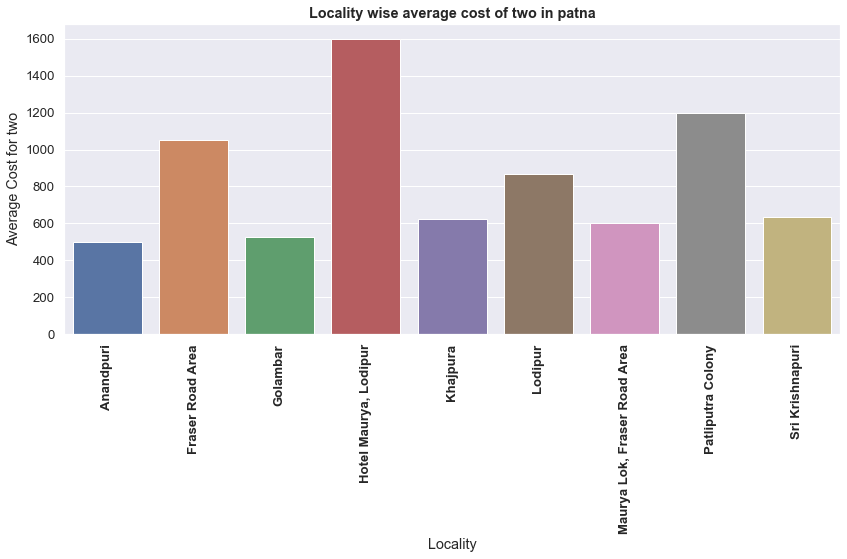

In [98]:
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.barplot(x="Locality", y="Average Cost for two", data=patna_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontweight="bold")
plt.title("Locality wise average cost of two in patna",fontweight="bold")
sns.set(font_scale=1.2)
plt.tight_layout()
plt.show()

In [99]:
Chandigarh_data = round(city_group.get_group("Chandigarh").groupby("Locality").mean()[["Average Cost for two","Price range","Aggregate rating","Votes"]],2).reset_index()

In [100]:
Chandigarh_data

,Locality,Average Cost for two,Price range,Aggregate rating,Votes
0,Chandigarh Industrial Area,850.0,2.0,3.70,665.0
1,"Elante Mall, Chandigarh Industrial Area",1440.0,3.0,4.12,679.2
2,Sector 26,1550.0,3.0,4.40,839.0
3,Sector 28,700.0,2.0,3.80,982.0
4,Sector 35,670.0,2.0,3.96,422.8
5,Sector 7,1500.0,3.0,3.85,451.5
6,Sector 8,550.0,2.0,4.25,302.5


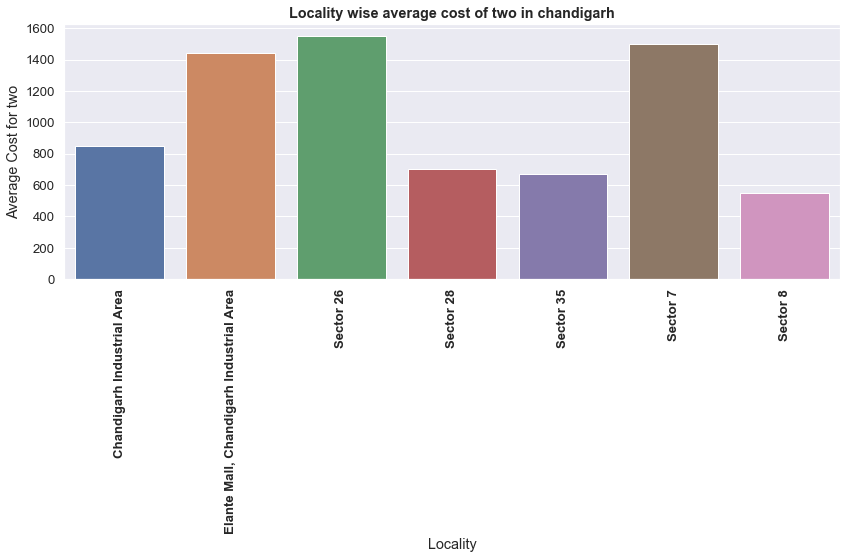

In [101]:
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.barplot(x="Locality", y="Average Cost for two", data=Chandigarh_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontweight="bold")
plt.title("Locality wise average cost of two in chandigarh",fontweight="bold")
sns.set(font_scale=1.2)
plt.tight_layout()
plt.show()

# THANKYOU